## Data Mining and Machine Learning
### Edgar Acuna
### Novelty detection using Mahalanobis Distance, MCD, LOF, Isolation Forest and Clustering(kmeans, DBSCAN)
#### Datasets: Diabetes, Landsat, and Shuttle
#### March 2022

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import StandardScaler

In [59]:
url= "https://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names)
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,2
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,2
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,2


### Extracting all the datapoints form class 1

In [60]:
yd=data['class']
X1=data[data['class']==1]
Xc1=X1.iloc[:,0:8]
print(Xc1)

     preg  plas  pres  skin  test  mass   pedi  age
1       1    85    66    29     0  26.6  0.351   31
3       1    89    66    23    94  28.1  0.167   21
5       5   116    74     0     0  25.6  0.201   30
7      10   115     0     0     0  35.3  0.134   29
10      4   110    92     0     0  37.6  0.191   30
..    ...   ...   ...   ...   ...   ...    ...  ...
762     9    89    62     0     0  22.5  0.142   33
763    10   101    76    48   180  32.9  0.171   63
764     2   122    70    27     0  36.8  0.340   27
765     5   121    72    23   112  26.2  0.245   30
767     1    93    70    31     0  30.4  0.315   23

[500 rows x 8 columns]


### 0. Exploring outliers using Boxplots

<AxesSubplot:>

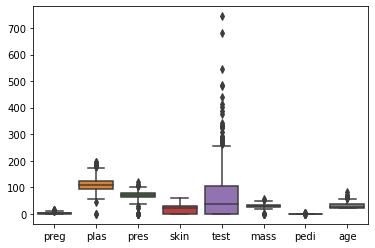

In [61]:
import seaborn as sns
sns.boxplot(data=Xc1)

#### Feature test shows a large amount of outliers

### 1. Outlier Detection using Mahalanobis Distance

In [62]:
#create function to calculate Mahalanobis distance
def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

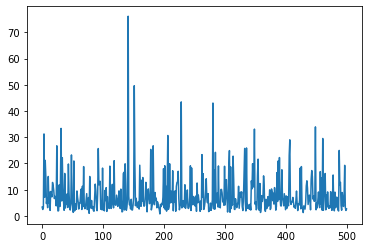

In [63]:
mh=mahalanobis(Xc1,data=Xc1)
plt.plot(mh)

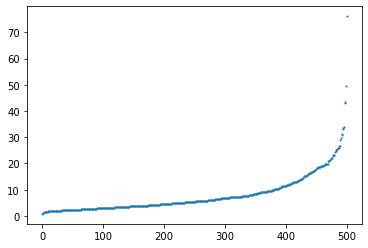

In [64]:
mh=mahalanobis(Xc1,data=Xc1)
plt.plot(np.sort(mh),marker='.',linestyle='None',markersize = 2.0)

<AxesSubplot:>

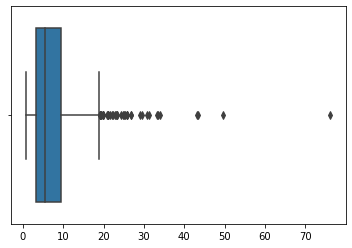

In [65]:
sns.boxplot(x=mh)

In [66]:
mh1=pd.Series(mh,index=Xc1.index)
outs= mh1[mh1 >20.0]
#print(outs.index)
print(outs)

7      31.273760
12     21.209561
49     26.750454
58     33.385928
60     22.212416
81     23.259208
86     20.970823
145    25.705911
182    21.065892
228    76.176431
247    49.672987
286    25.377663
294    26.750191
336    30.682114
371    43.494126
426    23.389467
453    43.070890
459    24.258342
487    24.920184
494    22.806980
519    25.751790
522    25.925746
537    33.121450
549    21.667486
593    20.984161
596    22.264786
621    23.051348
622    29.023577
684    33.959666
703    29.548576
744    24.982187
dtype: float64


### 2. Minimum  Covariance Distance ( MCD)

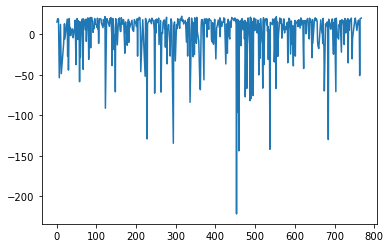

In [67]:
from sklearn.covariance import EllipticEnvelope
clf=EllipticEnvelope(contamination=0.25)
clf.fit(Xc1)
outmcd = clf.decision_function(Xc1)
outmcd=pd.Series(outmcd,index=Xc1.index)
plt.plot(outmcd)

<AxesSubplot:>

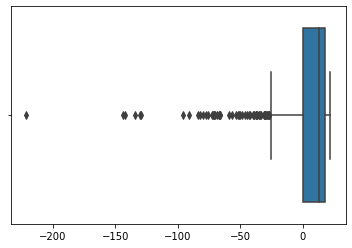

In [68]:
sns.boxplot(x=outmcd)

In [69]:
outs1= outmcd[outmcd < -40.0]
print(outs1)

7      -53.784415
12     -48.628311
30     -44.303555
58     -58.627106
67     -43.345313
123    -91.343246
148    -71.101183
212    -46.229662
223    -51.958172
228   -129.229139
247    -72.756506
263    -71.447072
294   -134.534317
336    -83.977925
361    -66.625178
362    -68.446186
371    -56.328212
453   -221.593289
456    -96.062792
459   -143.871470
475    -77.342576
479    -66.769723
487    -82.004662
489    -79.735364
495    -75.778010
509    -50.273862
519    -66.574625
537   -141.910628
552    -67.006676
622    -42.335089
674    -70.053326
684   -129.942122
703    -70.923018
763    -51.078142
dtype: float64


### 3. Isolation Forest

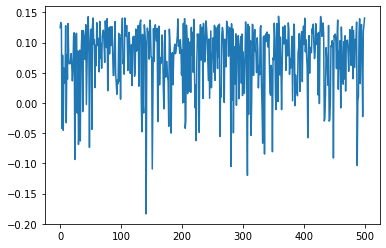

In [70]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(Xc1)
scores=model.decision_function(Xc1)
plt.plot(scores)

<AxesSubplot:>

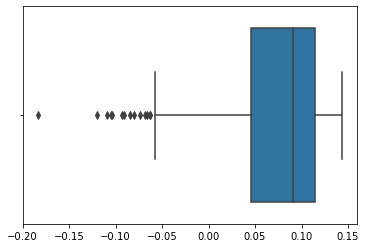

In [71]:
sns.boxplot(x=scores)

In [72]:
scores=pd.Series(scores,index=Xc1.index)
outs3= scores[scores < -0.05]
print(outs3)

49    -0.093589
57    -0.068689
60    -0.062944
81    -0.073576
228   -0.183705
247   -0.109344
362   -0.062499
426   -0.055461
453   -0.105163
487   -0.119906
494   -0.053725
519   -0.066511
522   -0.084567
537   -0.080702
622   -0.057593
684   -0.091134
744   -0.103637
dtype: float64


### 4. Outlier detection using Kmeans

In [73]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.neighbors import DistanceMetric

In [74]:
scaler = StandardScaler()
scaler.fit(Xc1)
Xd= scaler.transform(Xc1)

In [75]:
kmeans = KMeans(n_clusters=30, random_state=0).fit(Xd)
clustlabels=kmeans.labels_
#print(clustlabels)

In [76]:
#Finding the size of the two clusters formed
unique_elements, counts_elements = np.unique(clustlabels, return_counts=True)
print("Size of the formed clusters")
print(np.asarray((unique_elements, counts_elements)))

Size of the formed clusters
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 3 28 36 36 14  8 12 11  9 14 12  6 11 41  9 11  1 19 23 19 33 36 13  2
  10 11 16  2 32 22]]


In [77]:
inst1=Xc1.index
out11=inst1[np.where(clustlabels==0)]
out12=inst1[np.where(clustlabels==11)]
out13=inst1[np.where(clustlabels==16)]
out14=inst1[np.where(clustlabels==23)]
out15=inst1[np.where(clustlabels==27)]
out1all=np.concatenate([out11,out12,out13,out14,out15])
print(out1all)


[ 75 182 342  49  60  81 426 494 522 228 336 453  58 622]


### 5. Outlier detection using DBSCAN

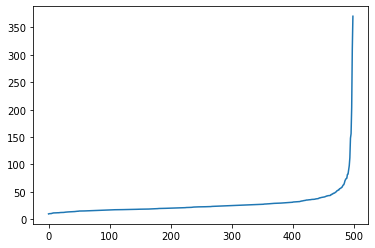

In [78]:
#Choosing the optimal epsilon
k = 10
# importing NearestNeighbors class 
from sklearn.neighbors import NearestNeighbors
# initialize model
neigh10 = NearestNeighbors(n_neighbors=10, n_jobs=-1)
# train for getting nearest neighbour
neigh10.fit(Xc1)
dist10, ind10 = neigh10.kneighbors(Xc1)
distances10 = [dist10[i][k-1] for i in range(len(dist10))]
distances10 = np.sort(distances10, axis=0)
plt.plot(distances10)

In [79]:
from sklearn.cluster import DBSCAN
eps=50
dbscan = DBSCAN(eps,min_samples=10).fit(Xc1)
dbscanlabels=dbscan.labels_
#print(dbscanlabels)
inst=Xc1.index
outd1=inst[np.where(dbscanlabels==-1)]
print(outd1)

Int64Index([75, 153, 182, 228, 247, 248, 258, 286, 342, 392, 486, 519, 645,
            710],
           dtype='int64')


### 6. Local Outlier Factor (LOF)

In [80]:
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(Xc1)
#print(np.where(y_pred==-1))

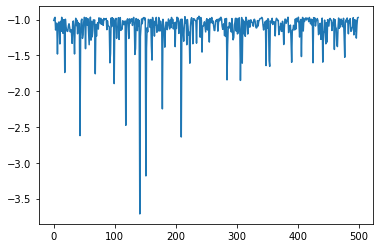

In [81]:
X_scores = clf.negative_outlier_factor_
plt.plot(X_scores)

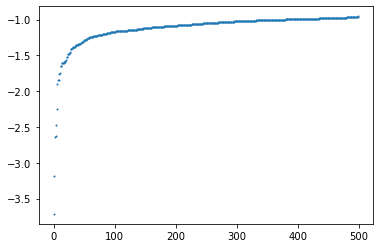

In [82]:
plt.plot(np.sort(X_scores),marker='.',linestyle='None',markersize = 2.0)

<AxesSubplot:>

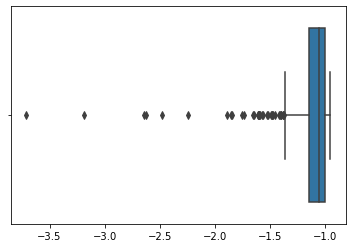

In [83]:
sns.boxplot(x=X_scores)

In [84]:
lofs1=pd.Series(X_scores,index=Xc1.index)
outs2= lofs1[lofs1 < -1.4]
print(outs2)

18    -1.480470
40    -1.738998
62    -1.479756
75    -2.620721
86    -1.405982
106   -1.756651
145   -1.603657
146   -1.472256
153   -1.893882
182   -2.477287
211   -1.486654
212   -1.402344
228   -3.714689
247   -3.183683
260   -1.565333
286   -2.246802
342   -2.639874
362   -1.608571
392   -1.453543
459   -1.842283
486   -1.849507
489   -1.607684
537   -1.642067
548   -1.572597
549   -1.653318
597   -1.596125
622   -1.516020
645   -1.603176
672   -1.593961
703   -1.416859
728   -1.526423
dtype: float64


### Outliers in Landsat

In [85]:
#Cargando el conjunto de datos Landsat
url='http://academic.uprm.edu/eacuna/landsat.txt'
data = pd.read_table(url, header=None,delim_whitespace=True)
y1=data.iloc[:,36]
X1=data[y1==1]
X1=X1.iloc[:,0:36]
X1.shape

(1072, 36)

#### 2.1 Mahalanobis Distance

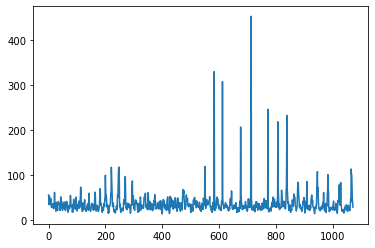

In [86]:
mh=mahalanobis(X1,data=X1)
plt.plot(mh)

In [87]:
mh1=pd.Series(mh,index=X1.index)
outs= mh1[mh1 >100.0]
#print(outs.index)
print(outs)

2962    116.927976
3011    106.831207
3012    115.581073
3013    117.553662
3517    118.496203
3573    329.363899
3633    306.983683
3751    206.343879
3821    163.068286
3822    452.452777
3934    245.589577
3996    217.975407
4054    151.293096
4055    231.807812
4237    107.054552
4296    100.581647
4419    112.983473
4420    100.601946
dtype: float64


#### 2.2 MCD estimator

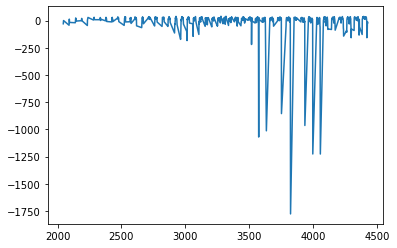

In [88]:
from sklearn.covariance import EllipticEnvelope
clf=EllipticEnvelope(contamination=0.25)
clf.fit(X1)
outmcd = clf.decision_function(X1)
outmcd=pd.Series(outmcd,index=X1.index)
plt.plot(outmcd)

In [89]:
outs1= outmcd[outmcd < -250.0]
print(outs1)

3573   -1070.240223
3633   -1013.206910
3751    -854.937889
3821    -862.223098
3822   -1776.939230
3934    -964.127892
3996   -1226.179660
4054    -590.186954
4055   -1226.559110
dtype: float64


#### 2.3 LOF score

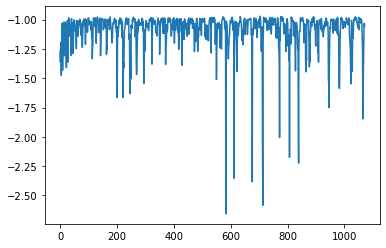

In [90]:
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = clf.fit_predict(X1)
#print(np.where(y_pred==-1))
X_scores = clf.negative_outlier_factor_
plt.plot(X_scores)

In [91]:
lofs1=pd.Series(X_scores,index=X1.index)
outs2= lofs1[lofs1 < -1.6]
print(outs2)

2915   -1.664278
2962   -1.664903
3010   -1.631462
3573   -2.658307
3633   -2.354013
3751   -2.384111
3821   -2.068993
3822   -2.585169
3934   -2.006856
3996   -2.175628
4054   -1.860583
4055   -2.224322
4237   -1.751119
4419   -1.846079
4420   -1.616746
dtype: float64


#### 2.4 Isolation Forest

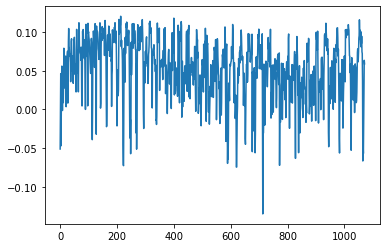

In [92]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(X1)
scores=model.decision_function(X1)
plt.plot(scores)

In [93]:
scores=pd.Series(scores,index=X1.index)
outs3= scores[scores < -0.05]
print(outs3)

2045   -0.051220
2963   -0.071685
2964   -0.072768
3013   -0.057323
3059   -0.051407
3603   -0.069807
3605   -0.063987
3665   -0.074586
3666   -0.074624
3751   -0.054653
3795   -0.056079
3822   -0.135156
3934   -0.072338
4044   -0.063318
4055   -0.055987
4296   -0.056367
4358   -0.052796
4419   -0.066702
4421   -0.056972
dtype: float64


#### 2.5 K-means

In [94]:
scaler = StandardScaler()
scaler.fit(X1)
Xd= scaler.transform(X1)

In [95]:
kmeans = KMeans(n_clusters=40, random_state=0).fit(X1)
clustlabels=kmeans.labels_

In [96]:
#Finding the size of the two clusters formed
unique_elements, counts_elements = np.unique(clustlabels, return_counts=True)
print("Size of the formed clusters")
print(np.asarray((unique_elements, counts_elements)))

Size of the formed clusters
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
 [25 44 27 21 22 27 18 29 25 14 18 25 88 21 55 27 32 17 43 31 28 23 30 19
  34 26 35  2 14  3  1  4 31 80 49 21 32 14  3 14]]


In [97]:
inst1=X1.index
out11=inst1[np.where(clustlabels==27)]
out12=inst1[np.where(clustlabels==29)]
out13=inst1[np.where(clustlabels==30)]
out14=inst1[np.where(clustlabels==31)]
out15=inst1[np.where(clustlabels==38)]
out1all=np.concatenate([out11,out12,out13,out14,out15])
print(out1all)

[3573 3633 3996 4054 4055 3822 2915 2916 2962 4295 3751 3821 3934]


#### DBSCAN

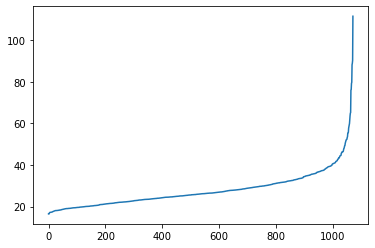

In [98]:
#Choosing the optimal epsilon
k = 10
# importing NearestNeighbors class 
from sklearn.neighbors import NearestNeighbors
# initialize model
neigh10 = NearestNeighbors(n_neighbors=10, n_jobs=-1)
# train for getting nearest neighbour
neigh10.fit(X1)
dist10, ind10 = neigh10.kneighbors(X1)
distances10 = [dist10[i][k-1] for i in range(len(dist10))]
distances10 = np.sort(distances10, axis=0)
plt.plot(distances10)

In [99]:
from sklearn.cluster import DBSCAN
eps=40
dbscan = DBSCAN(eps,min_samples=10).fit(X1)
dbscanlabels=dbscan.labels_
#print(dbscanlabels)
inst=X1.index
outd1=inst[np.where(dbscanlabels==-1)]
print(outd1)

Int64Index([2915, 2962, 2963, 2964, 3011, 3012, 3013, 3059, 3104, 3105, 3573,
            3633, 3751, 3821, 3822, 3934, 3996, 4054, 4055, 4116, 4235, 4236,
            4237, 4295, 4296, 4358, 4419, 4420, 4421],
           dtype='int64')


### Outliers in Landsat class 1: 3822, 3573, 3633, 3934, 3996, 4054,4055,3821, 3751

### Outliers in Shuttle

In [100]:
url = "https://academic.uprm.edu/eacuna/shuttle.trn"
data = pd.read_table(url, header=None,delim_whitespace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43500 entries, 0 to 43499
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       43500 non-null  int64
 1   1       43500 non-null  int64
 2   2       43500 non-null  int64
 3   3       43500 non-null  int64
 4   4       43500 non-null  int64
 5   5       43500 non-null  int64
 6   6       43500 non-null  int64
 7   7       43500 non-null  int64
 8   8       43500 non-null  int64
 9   9       43500 non-null  int64
dtypes: int64(10)
memory usage: 3.3 MB


In [101]:
y1=data.iloc[:,9]
y1.value_counts()

1    34108
4     6748
5     2458
3      132
2       37
7       11
6        6
Name: 9, dtype: int64

In [102]:
X1=data[y1==1]
X1=X1.iloc[:,0:9]
X1.shape

(34108, 9)

### 3.1 Mahalanobis Distance

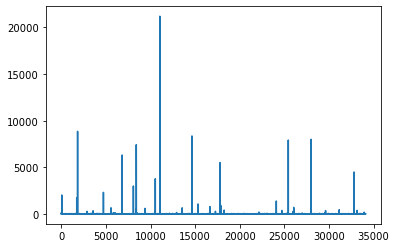

In [103]:
mh=mahalanobis(X1,data=X1)
plt.plot(mh)

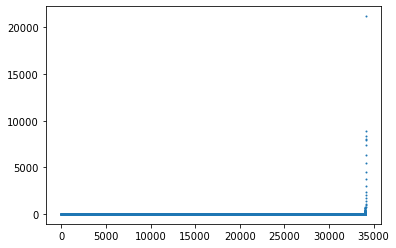

In [104]:
plt.plot(np.sort(mh),marker='.',linestyle='None',markersize = 2.0)

<AxesSubplot:>

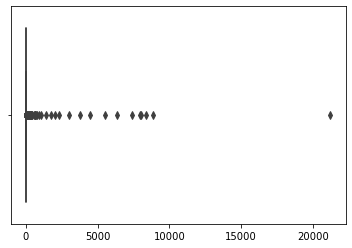

In [105]:
sns.boxplot(x=mh)

In [106]:
mh1=pd.Series(mh,index=X1.index)
outs= mh1[mh1 >1000.0]
#print(outs.index)
print(outs)

70        2026.135943
2174      1752.125937
2294      8854.702824
6004      2311.342095
8688      6316.105917
10303     2994.194069
10730     7419.469448
13430     3768.070264
14059    21201.939508
18624     8362.563867
19474     1069.365344
22645     5503.759986
30721     1383.539142
32422     7922.894466
35729     8003.947584
41854     4497.525471
dtype: float64


### 3.2 Isolation forest

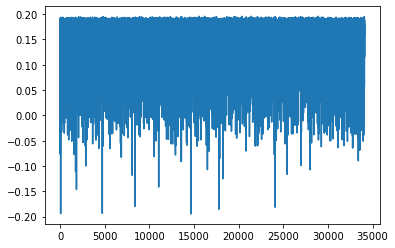

In [107]:
model=IsolationForest(n_estimators=100, max_samples=5000, contamination=float(0.01),max_features=1.0)
model.fit(X1)
scores=model.decision_function(X1)
plt.plot(scores)

In [108]:
scores=pd.Series(scores,index=X1.index)
outs3= scores[scores < -0.08]
print(outs3)

70      -0.194046
2174    -0.111110
2294    -0.146394
3620    -0.099862
6004    -0.193504
8688    -0.081011
8723    -0.082833
10303   -0.118210
10730   -0.179929
13388   -0.081632
14059   -0.141516
17207   -0.090841
17255   -0.090529
18624   -0.194640
21005   -0.107172
22645   -0.185357
22736   -0.085221
23224   -0.125171
30721   -0.181393
32422   -0.116296
34429   -0.098804
35729   -0.107371
42625   -0.089685
dtype: float64


### 3.3 k-means

In [109]:
scaler = StandardScaler()
scaler.fit(X1)
Xd= scaler.transform(X1)

In [110]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(X1)
clustlabels=kmeans.labels_

In [111]:
#Finding the size of the two clusters formed
unique_elements, counts_elements = np.unique(clustlabels, return_counts=True)
print("Size of the formed clusters")
print(np.asarray((unique_elements, counts_elements)))

Size of the formed clusters
[[    0     1     2     3     4     5     6     7     8     9]
 [26234     2     2     9     4     4     5  7829     1    18]]


In [112]:
inst1=X1.index
out11=inst1[np.where(clustlabels==1)]
out12=inst1[np.where(clustlabels==2)]
out13=inst1[np.where(clustlabels==4)]
out14=inst1[np.where(clustlabels==5)]
out15=inst1[np.where(clustlabels==8)]
out1all=np.concatenate([out11,out12,out13,out14,out15])
print(out1all)

[ 8688 32422 10730 22645  6004 13430 18624 35729  2174 10303 14059 41854
  2294]


### Outliers in Shuttle class 1: 2174, 2294, 6004, 8688, 10303, 10730, 13430,14059, 18624, 22645,32422, 35729

### 3.4 LOF score

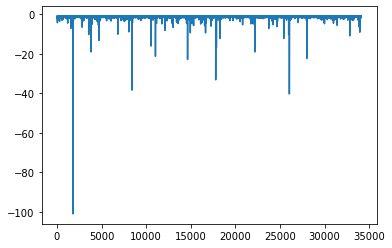

In [113]:
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = clf.fit_predict(X1)
#print(np.where(y_pred==-1))
X_scores = clf.negative_outlier_factor_
plt.plot(X_scores)

In [114]:
lofs1=pd.Series(X_scores,index=X1.index)
outs2= lofs1[lofs1 < -15.0]
print(outs2)

2294    -101.045458
4879     -19.011280
10730    -38.341835
13430    -16.050723
14059    -21.253799
18624    -22.854254
22645    -33.122981
22736    -16.835139
28275    -19.010980
33182    -40.304309
35729    -22.380985
dtype: float64


In [1]:
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = clf.fit_predict(X1)
#print(np.where(y_pred==-1))
X_scores = clf.negative_outlier_factor_
plt.plot(X_scores)

NameError: name 'LocalOutlierFactor' is not defined